# Time series plot

Time series data are those with a time dimension besides other features or column. This means that the order of the instances in the data indicates their chronological order. Most commonly, we visualize time series using line plot.

## Load data

We start simple and use the Horton hospital data set (available at https://archive.ics.uci.edu/ml/datasets/Horton+General+Hospital). The first column is just the instance index, so we will drop it.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('HortonGeneralHospital.csv')
data.head(2)

,Unnamed: 0,Cardio,Resp,Hypo,Adm,year,month
0,1,1,0,0,413,1999,11
1,2,1,0,0,443,1999,12


We will only use the last three columns for demonstration, the rest can be dropped. This is optional though.

Among the three left, `Adm` is the column with actual data that we want to visualize. `year` and `month` are time indicators, so there are no points in drawing them. However, they are useful to use as axis tick labels as we will see later on.

In [2]:
data = data.iloc[:,-3:]
data.head(2)

,Adm,year,month
0,413,1999,11
1,443,1999,12


## Basic line plot 

### In matplotlib

The line plot can be drawed easily with `pyplot.plot()`. At minimum, we need to provide the data array or column

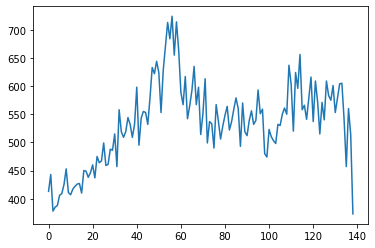

In [3]:
column = 'Adm'

plt.plot(data[column])
plt.show()

As you can see, drawing with only the time series column result in the ticks in the horizontal axis being just the instances' index. If the data does not have other time columns, we can't really do anything else. 

However, this data come with month and year, so we can try create a datetime column with pandas to use as ticks. The easiest way is to create a date string in the format `year-month-01` then use `pandas.to_datetime()`

In [4]:
data['datetime'] = pd.to_datetime(data['year'].astype('str') + '-' + data['month'].astype('str') + '-01')
data.head(n=3)

,Adm,year,month,datetime
0,413,1999,11,1999-11-01
1,443,1999,12,1999-12-01
2,378,2000,1,2000-01-01


Now, we can use the datetime column in our plot. We use `pyplot.gcf().autofmt_xdate()` to allow matplotlib to automatically format the time labels

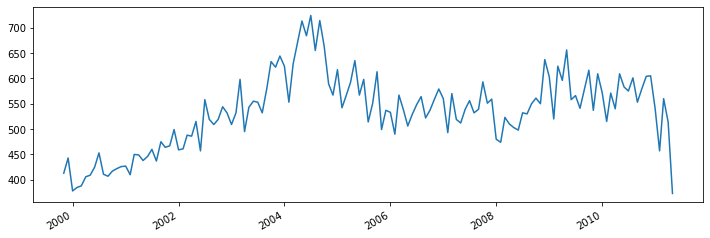

In [5]:
column = 'Adm'
time_col = 'datetime'

plt.figure(figsize=(12,4))
plt.plot(data[time_col], data[column])
plt.gcf().autofmt_xdate()
plt.show()

We can adjust styles so the plot looks better

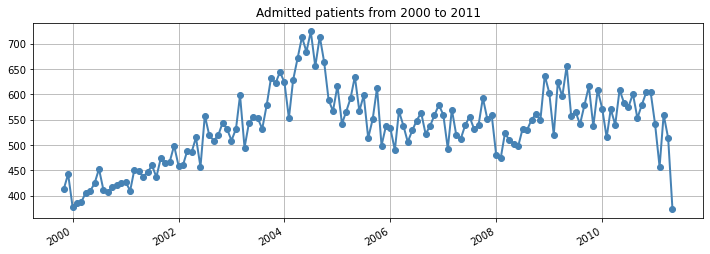

In [6]:
column = 'Adm'
time_col = 'datetime'
title = 'Admitted patients from 2000 to 2011'

plt.figure(figsize=(12,4))
plt.plot(
    data[time_col], 
    data[column],
    marker='o',
    markersize=6,
    markerfacecolor='steelblue',
    color='steelblue',
    linewidth=2,
)
plt.grid(visible=True)
plt.gcf().autofmt_xdate()
plt.title(title)
plt.show()

### In pandas

In pandas, we can use `DataFrame.plot.line()` to draw line plot. The time column acts as `x`, and the value column `y`. The time labels are automatically formatted in pandas

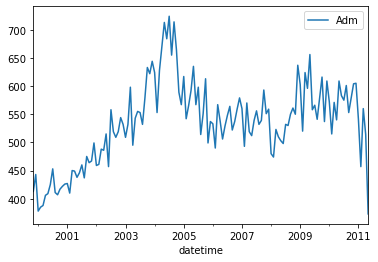

In [7]:
data.plot.line(x='datetime',y='Adm')
plt.show()

With some adjustments

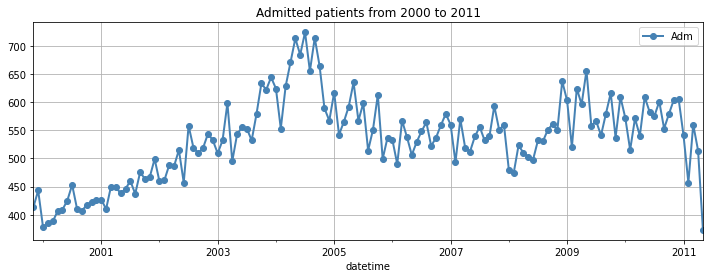

In [8]:
column = 'Adm'
time_col = 'datetime'
title = 'Admitted patients from 2000 to 2011'

data.plot.line(
    x=time_col,
    y=column,
    marker='o',
    markersize=6,
    markerfacecolor='steelblue',
    color='steelblue',
    linewidth=2,
    title=title,
    figsize=(12,4)
)
plt.grid(visible=True)
plt.show()

### In seaborn

We use `seaborn.lineplot()`. Like pandas, the time column acts as `x`, and the value column `y`

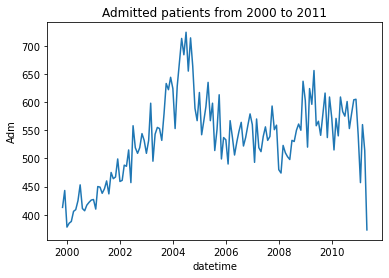

In [9]:
import seaborn as sn

column = 'Adm'
time_col = 'datetime'
title = 'Admitted patients from 2000 to 2011'

sn.lineplot(
    data=data,
    x=time_col,
    y=column,
)

plt.title(title)
plt.show()

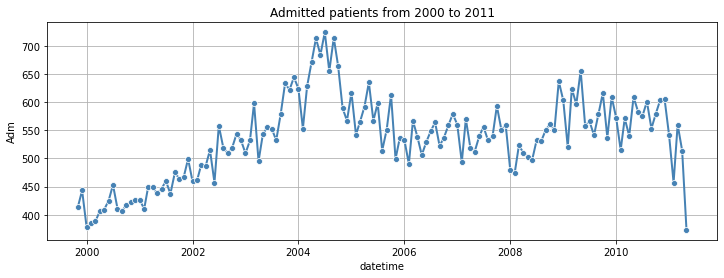

In [10]:
column = 'Adm'
time_col = 'datetime'
title = 'Admitted patients from 2000 to 2011'

plt.figure(figsize=(12,4))
sn.lineplot(
    data=data,
    x=time_col,
    y=column,
    marker='o',
    markersize=6,
    markerfacecolor='steelblue',
    color='steelblue',
    linewidth=2,
)
plt.grid(visible=True)
plt.title(title)
plt.show()

## Moving average smoothing

Sometimes a time series can be too noisy and fluctuates too much which makes its trend unclear. If needed, we can smooth the time series to have a clearer trend visualization. 

The easiest way is to use moving-average smoothing which can be done with pandas `rolling()` function. We need to specify a window size - how many time points around an instance that will be used to calculate the average

In [11]:
column = 'Adm'
time_col = 'datetime'
window_size = 7

ma_data = data[[time_col, column]].copy()
ma_data['ma'] = data[[column]].rolling(window_size, min_periods=window_size//2).mean()

Plotting the lines are like before. Since we can only specify one style with one `plot()` call, it is probably better to leave the formatting for matplotlib

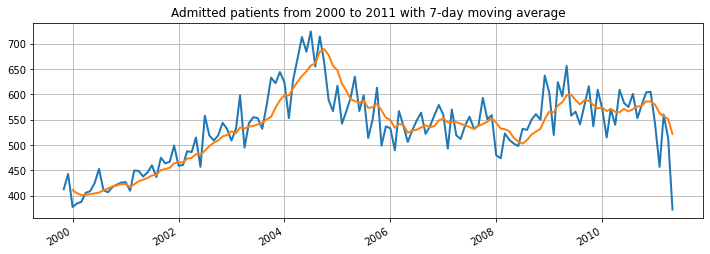

In [12]:
column = 'Adm'
time_col = 'datetime'
window_size = 7
title = 'Admitted patients from 2000 to 2011 with 7-day moving average'

ma_data = data[[time_col, column]].copy()
ma_data['ma'] = data[[column]].rolling(window_size, min_periods=window_size//2).mean()
plt.figure(figsize=(12,4))
plt.plot(
    ma_data[time_col], 
    ma_data[[column, 'ma']],
    linewidth=2,
)
plt.grid(visible=True)
plt.gcf().autofmt_xdate()
plt.title(title)
plt.show()

If you want to manually style the lines, split the `plot()` into multiple calls

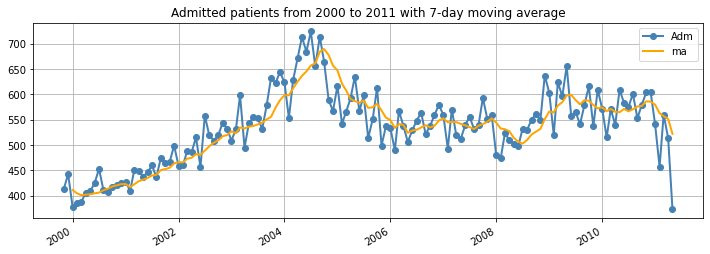

In [13]:
column = 'Adm'
time_col = 'datetime'
window_size = 7
title = 'Admitted patients from 2000 to 2011 with 7-day moving average'

ma_data = data[[time_col, column]].copy()
ma_data['ma'] = data[[column]].rolling(window_size, min_periods=window_size//2).mean()
plt.figure(figsize=(12,4))
#value series
plt.plot(
    ma_data[time_col], 
    ma_data[column],
    marker='o',
    markersize=6,
    markerfacecolor='steelblue',
    color='steelblue',
    linewidth=2,
    label=column
)
#ma series
plt.plot(
    ma_data[time_col], 
    ma_data['ma'],
    color='orange',
    linewidth=2,
    label='ma'
)
plt.legend()
plt.grid(visible=True)
plt.gcf().autofmt_xdate()
plt.title(title)
plt.show()

Or by using pandas. Multiple value series can be input to `y=` as a list

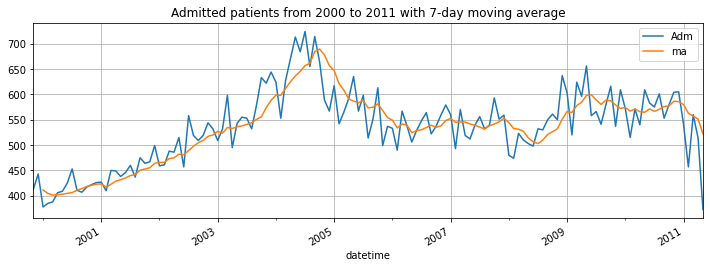

In [14]:
column = 'Adm'
time_col = 'datetime'
window_size = 7
title = 'Admitted patients from 2000 to 2011 with 7-day moving average'

ma_data = data[[time_col, column]].copy()
ma_data['ma'] = data[[column]].rolling(window_size, min_periods=window_size//2).mean()
ma_data.plot.line(
    x=time_col,
    y=[column, 'ma'],
    title=title,
    figsize=(12,4)
)
plt.grid(visible=True)
plt.gcf().autofmt_xdate()
plt.title(title)
plt.show()

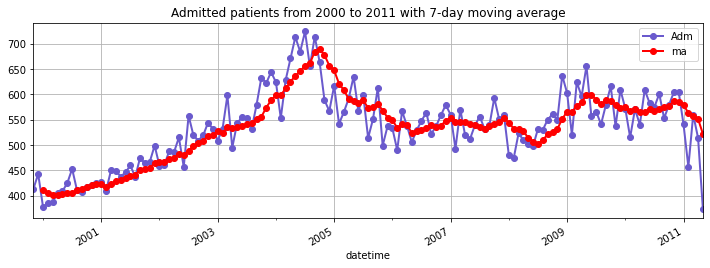

In [15]:
column = 'Adm'
time_col = 'datetime'
window_size = 7
title = 'Admitted patients from 2000 to 2011 with 7-day moving average'

ma_data = data[[time_col, column]].copy()
ma_data['ma'] = data[[column]].rolling(window_size, min_periods=window_size//2).mean()
ma_data.plot.line(
    x=time_col,
    y=[column, 'ma'],
    color=['slateblue','red'],
    marker='o',
    linewidth=2,
    title=title,
    figsize=(12,4)
)
plt.grid(visible=True)
plt.gcf().autofmt_xdate()
plt.title(title)
plt.show()

We can input the whole dataframe to seaborn. Only numeric columns will be plotted. However, we also lose the time labels on the horizontal axis.

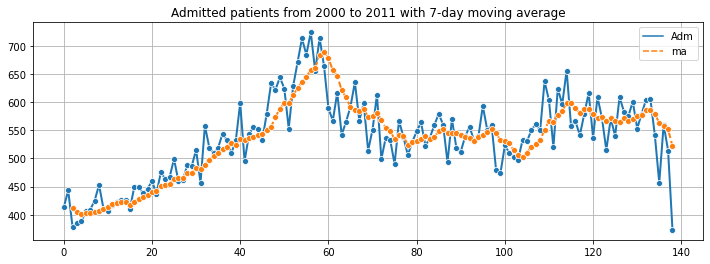

In [16]:
column = 'Adm'
time_col = 'datetime'
window_size = 7
title = 'Admitted patients from 2000 to 2011 with 7-day moving average'

ma_data = data[[time_col, column]].copy()
ma_data['ma'] = data[[column]].rolling(window_size, min_periods=window_size//2).mean()
plt.figure(figsize=(12,4))
sn.lineplot(
    data=ma_data,
    marker='o',
    linewidth=2,
)
plt.grid(visible=True)
plt.title(title)
plt.show()

To have full control over the plot, I recommend drawing each series separately 

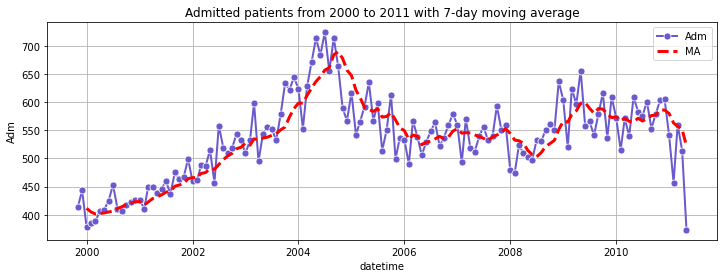

In [17]:
column = 'Adm'
time_col = 'datetime'
window_size = 7
title = 'Admitted patients from 2000 to 2011 with 7-day moving average'

ma_data = data[[time_col, column]].copy()
ma_data['ma'] = data[[column]].rolling(window_size, min_periods=window_size//2).mean()
plt.figure(figsize=(12,4))
sn.lineplot(
    x=ma_data[time_col],
    y=ma_data[column],
    color='slateblue',
    marker='o',
    markersize=7,
    linewidth=2,
    label=column
)
sn.lineplot(
    x=ma_data[time_col],
    y=ma_data['ma'],
    color='red',
    linestyle='--',
    linewidth=3,
    label='MA'
)
plt.legend()
plt.grid(visible=True)
plt.title(title)
plt.show()

## Moving standard deviation

With a moving average, we may further want to add a moving standard deviation band to observe when the time series fluctuates too much. This is also more of a data transformation task, since drawing the band is fairly easy after that.

### In matplotlib

We still use pandas `rolling()` to add standard deviations. We can also decide how many standard deviations from the mean to fill. A common value is `3`. Finally, we use `pyplot.fill_between()` to draw the band. It is important to set a low alpha so that the band presents enough and not too much

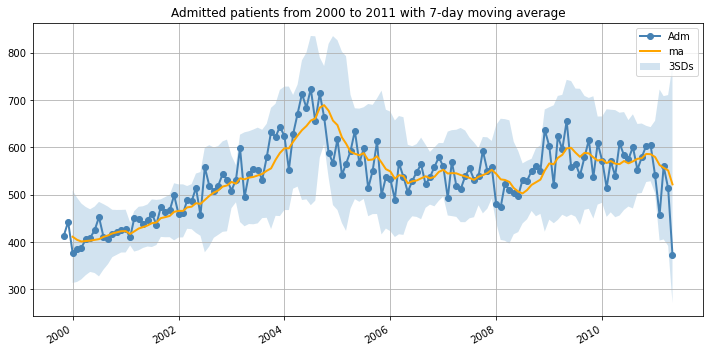

In [18]:
column = 'Adm'
time_col = 'datetime'
window_size = 7
n_sds = 3
title = 'Admitted patients from 2000 to 2011 with 7-day moving average'

ma_data = data[[time_col, column]].copy()
rolling = data[column].rolling(window_size, min_periods=window_size//2)
ma_data['ma'] = rolling.mean()
ma_data['lower'] = ma_data['ma'] - n_sds*rolling.std()
ma_data['upper'] = ma_data['ma'] + n_sds*rolling.std()
plt.figure(figsize=(12,6))
#value series
plt.plot(
    ma_data[time_col], 
    ma_data[column],
    marker='o',
    markersize=6,
    markerfacecolor='steelblue',
    color='steelblue',
    linewidth=2,
    label=column
)
#ma series
plt.plot(
    ma_data[time_col], 
    ma_data['ma'],
    color='orange',
    linewidth=2,
    label='ma'
)
#standard deviation band
plt.fill_between(ma_data[time_col],ma_data['lower'],ma_data['upper'],alpha=0.2,label=str(n_sds)+'SDs')
plt.legend()
plt.grid(visible=True)
plt.gcf().autofmt_xdate()
plt.title(title)
plt.show()

Just for fun, you can even draw one band for each number of standard deviations, for example, `1`, `2`, and `3`. The code becomes unreasonably long for a plot though, and it is not wholely necessary.

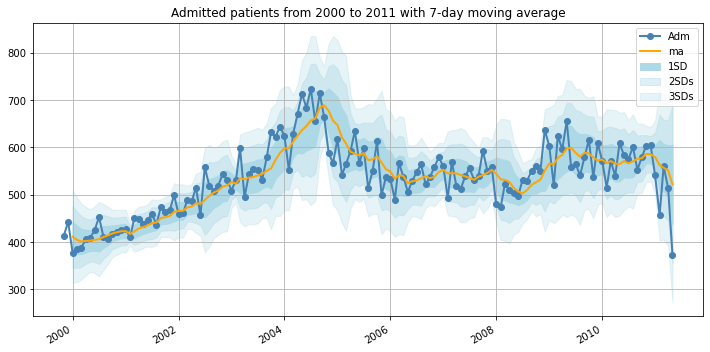

In [19]:
column = 'Adm'
time_col = 'datetime'
window_size = 7
n_sds = 3
title = 'Admitted patients from 2000 to 2011 with 7-day moving average'

ma_data = data[[time_col, column]].copy()
rolling = data[column].rolling(window_size, min_periods=window_size//2)
ma_data['ma'] = rolling.mean()
plt.figure(figsize=(12,6))
#value series
plt.plot(
    ma_data[time_col], 
    ma_data[column],
    marker='o',
    markersize=6,
    markerfacecolor='steelblue',
    color='steelblue',
    linewidth=2,
    label=column
)
#ma series
plt.plot(
    ma_data[time_col], 
    ma_data['ma'],
    color='orange',
    linewidth=2,
    label='ma'
)
#standard deviation bands
m = ma_data['ma']
sd = rolling.std()
plt.fill_between(ma_data[time_col],m-sd,m+sd,color='lightblue',alpha=1,label='1SD')
plt.fill_between(ma_data[time_col],m-2*sd,m+2*sd,color='lightblue',alpha=0.4,label='2SDs')
plt.fill_between(ma_data[time_col],m-3*sd,m+3*sd,color='lightblue',alpha=0.3,label='3SDs')

plt.legend()
plt.grid(visible=True)
plt.gcf().autofmt_xdate()
plt.title(title)
plt.show()

### In seaborn

Pandas `plot()` and pyplot `fill_between()` do not play nice with each other. So we will just skip to seaborn. Everything with the standard deviation bar is pretty much the same 

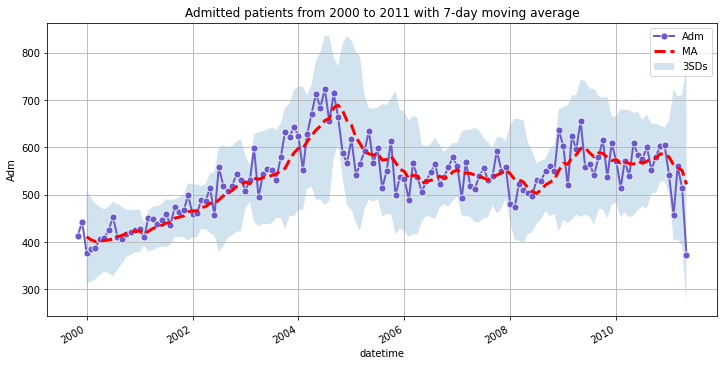

In [20]:
column = 'Adm'
time_col = 'datetime'
window_size = 7
n_sds = 3
title = 'Admitted patients from 2000 to 2011 with 7-day moving average'

ma_data = data[[time_col, column]].copy()
rolling = data[column].rolling(window_size, min_periods=window_size//2)
ma_data['ma'] = rolling.mean()
ma_data['lower'] = ma_data['ma'] - n_sds*rolling.std()
ma_data['upper'] = ma_data['ma'] + n_sds*rolling.std()
plt.figure(figsize=(12,6))
sn.lineplot(
    x=ma_data[time_col],
    y=ma_data[column],
    color='slateblue',
    marker='o',
    markersize=7,
    linewidth=2,
    label=column
)
sn.lineplot(
    x=ma_data[time_col],
    y=ma_data['ma'],
    color='red',
    linestyle='--',
    linewidth=3,
    label='MA',
)
#standard deviation band
plt.fill_between(ma_data[time_col],ma_data['lower'],ma_data['upper'],alpha=0.2,label=str(n_sds)+'SDs')
plt.legend()
plt.grid(visible=True)
plt.gcf().autofmt_xdate()
plt.title(title)
plt.show()

# Multivariate time series plots

At times, we may want to draw multiple time series in the same plot to compare them.

## Load data

For demonstration, we will use a stock data set - the SPY series from 2020 to March 2022. The data can be downloaded from Yahoo finance. We have six series, `Open`, `High`, `Low`, `Close`, `Adj Close`, and `Volume`. First, we load the data and convert Date to pandas datetime

In [21]:
data = pd.read_csv('SPY.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,323.540009,324.890015,322.529999,324.869995,314.719208,59151200
1,2020-01-03,321.160004,323.640015,321.100006,322.410004,312.336060,77709700


## Subplots

### In matplotlib

We can draw each time series in a separate subplot. This involve using pyplot subplots with defined number of rows and columns, and loop through each time series to draw them in their correct subplot. All visual options like markers, colors, line widths, etc. are still available

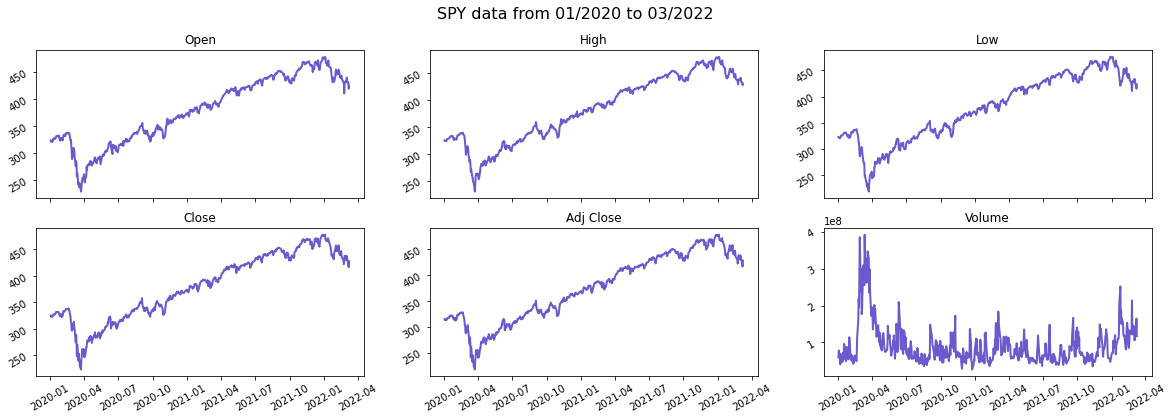

In [22]:
columns = ['Open','High','Low','Close','Adj Close','Volume']
time_col = 'Date'
nrows = 2
ncols = 3
title = 'SPY data from 01/2020 to 03/2022'

fig, axs = plt.subplots(nrows, ncols, figsize=(20,6), sharex=True)
col = 0
for i in range(nrows):
    for j in range(ncols):
        if i*nrows + j > len(columns):
            break
        axs[i, j].plot(data[time_col], data[columns[col]], linewidth=2, color='slateblue')
        axs[i, j].set_title(columns[col])
        axs[i, j].tick_params(labelrotation=30)
        col += 1
plt.suptitle(title, fontsize=16)
plt.show()

### In pandas

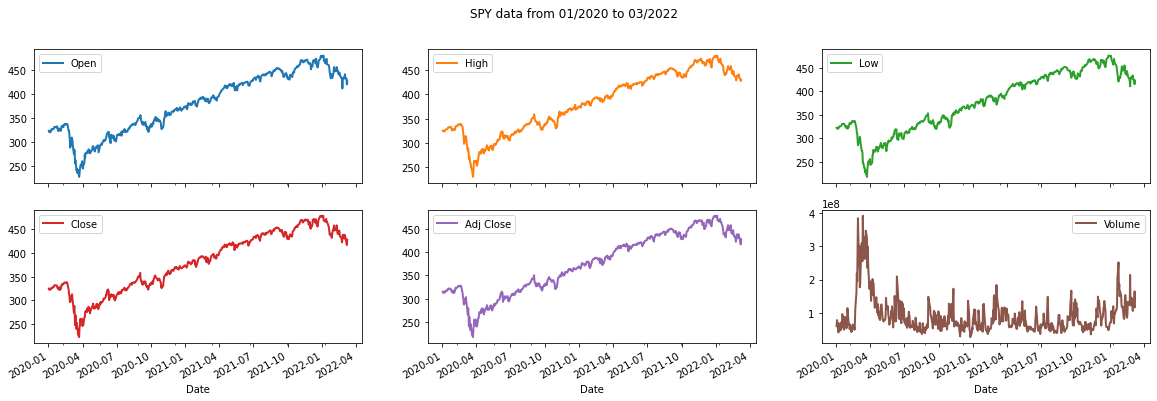

In [23]:
columns = ['Open','High','Low','Close','Adj Close','Volume']
time_col = 'Date'
nrows = 2
ncols = 3
title = 'SPY data from 01/2020 to 03/2022'

data.plot(
    kind='line',
    x=time_col,
    y=columns,
    linewidth=2,
    subplots=True,
    sharex=True,
    layout=(nrows,ncols),
    title=title,
    figsize=(20,6)
)
plt.show()

### In seaborn

Seaborn is similar to matplotlib. We have to manually use subplots then loop through the series to draw them

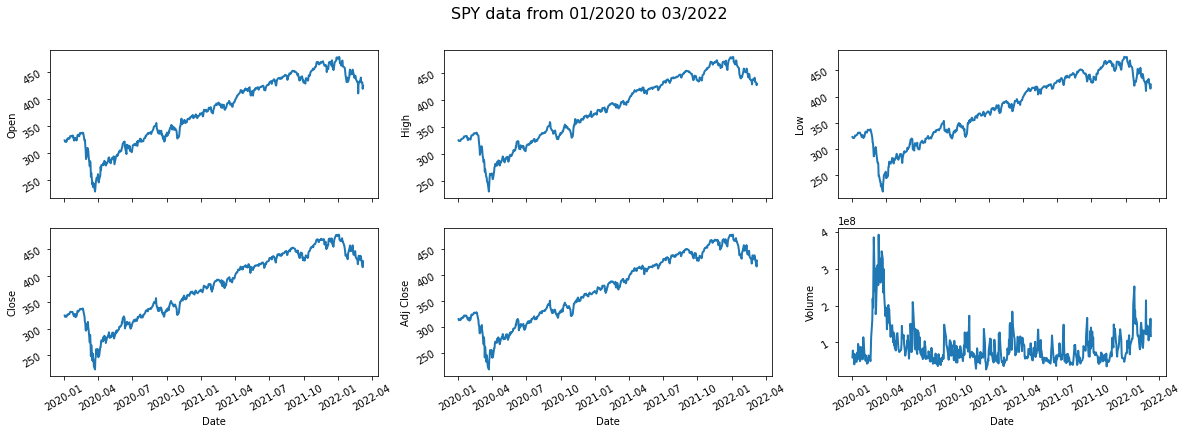

In [24]:
columns = ['Open','High','Low','Close','Adj Close','Volume']
time_col = 'Date'
nrows = 2
ncols = 3
title = 'SPY data from 01/2020 to 03/2022'

fig, axs = plt.subplots(nrows, ncols, figsize=(20,6), sharex=True)
col = 0
for i in range(nrows):
    for j in range(ncols):
        if i*nrows + j > len(columns):
            break
        sn.lineplot(
            data=data,
            x=time_col,
            y=columns[col],
            linewidth=2,
            ax=axs[i,j]
        )
        axs[i, j].tick_params(labelrotation=30)
        col += 1
plt.suptitle(title, fontsize=16)
plt.show()

## Superimpose the series

Besides drawing separately, the series can be superimposed in one single plot. Due to its significantly higher scale, we remove Volume from the plot

### In matplotlib

Like drawing a single time series with moving average, we can input the whole dataframe to `pyplot.plot()`. However, this method is fairly limited in terms of adjustments

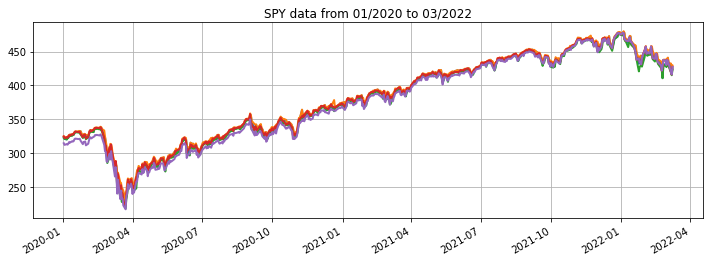

In [25]:
columns = ['Open','High','Low','Close','Adj Close']
time_col = 'Date'
title = 'SPY data from 01/2020 to 03/2022'

plt.figure(figsize=(12,4))
plt.plot(
    data[time_col], 
    data[columns],
    linewidth=2,
)
plt.grid(visible=True)
plt.gcf().autofmt_xdate()
plt.title(title)
plt.show()

Instead, we can write a loop. Due to the numbers of lines, we probably should not draw markers as it will be difficult to read

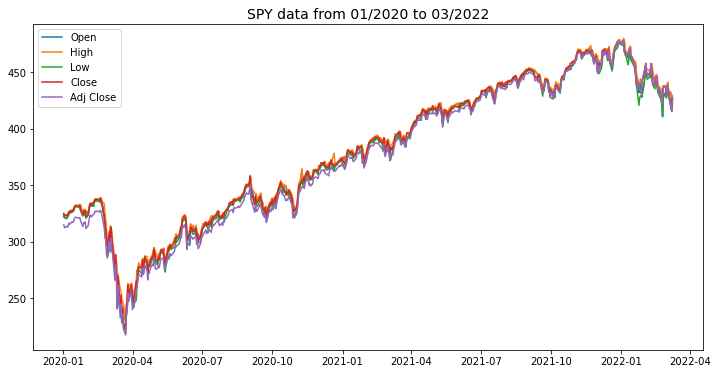

In [26]:
columns = ['Open','High','Low','Close','Adj Close']
time_col = 'Date'
title = 'SPY data from 01/2020 to 03/2022'

plt.figure(figsize=(12,6))
for col in columns:
    plt.plot(data[time_col], data[col], label=col)
plt.legend()
plt.title(title, fontsize=14)
plt.show()

### In pandas

Pretty similar like before, however, we remove all options for subplots

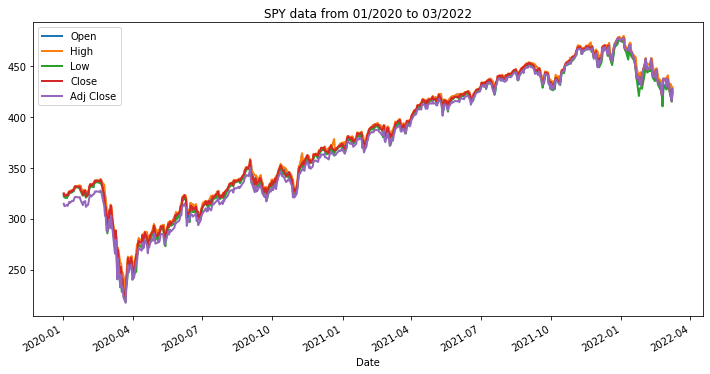

In [27]:
columns = ['Open','High','Low','Close','Adj Close']
time_col = 'Date'
title = 'SPY data from 01/2020 to 03/2022'

data.plot(
    kind='line',
    x=time_col,
    y=columns,
    linewidth=2,
    title=title,
    figsize=(12,6)
)
plt.show()

### In seaborn

Again, very similar to matplotlib

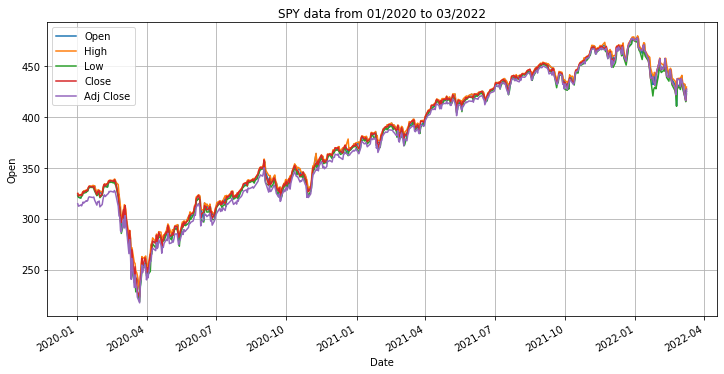

In [28]:
columns = ['Open','High','Low','Close','Adj Close']
time_col = 'Date'
title = 'SPY data from 01/2020 to 03/2022'

plt.figure(figsize=(12,6))
for col in columns:
    sn.lineplot(data=data,x=data[time_col], y=data[col], label=col)
plt.legend()
plt.grid(visible=True)
plt.gcf().autofmt_xdate()
plt.title(title)
plt.show()

## Candle stick plot

We can also use a candlestick plot to illustrate stock data. This type of plot allows representing all four features (`Open`, `Close`, `High`, and `Low`) in a single plot. For each day, the filled box represent open and close, and the line represent low and high. The color of the day indicates if open is higher than close or not.

There are some packages that specifically draw candlestick charts. However, among matplotlib, pandas, and seaborn, the best way is to manually draw the components with matplotlib

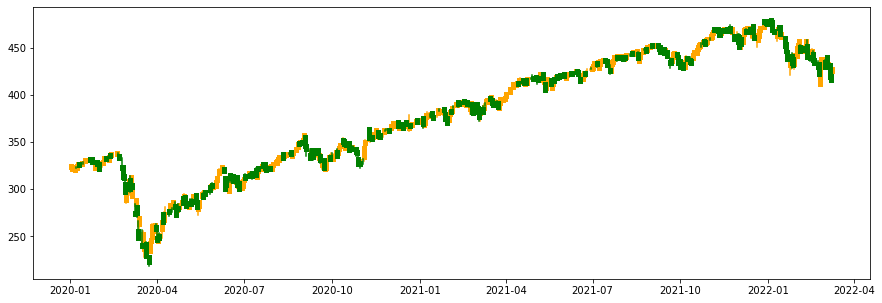

In [29]:
plt.figure(figsize=(15,5))
#plot up days
up = data['Open'] < data['Close']
plt.plot([data['Date'][up],data['Date'][up]],[data['High'][up],data['Low'][up]],color='orange')
plt.plot([data['Date'][up],data['Date'][up]],[data['Open'][up],data['Close'][up]],color='orange',linewidth=5)

#plot down days
down = data['Open'] >= data['Close']
plt.plot([data['Date'][~up],data['Date'][~up]],[data['High'][~up],data['Low'][~up]],color='green')
plt.plot([data['Date'][~up],data['Date'][~up]],[data['Open'][~up],data['Close'][~up]],color='green',linewidth=5)

plt.show()

We can change into matplotlib interactive mode for easier reading with the candlestick plot

<IPython.core.display.Javascript object>


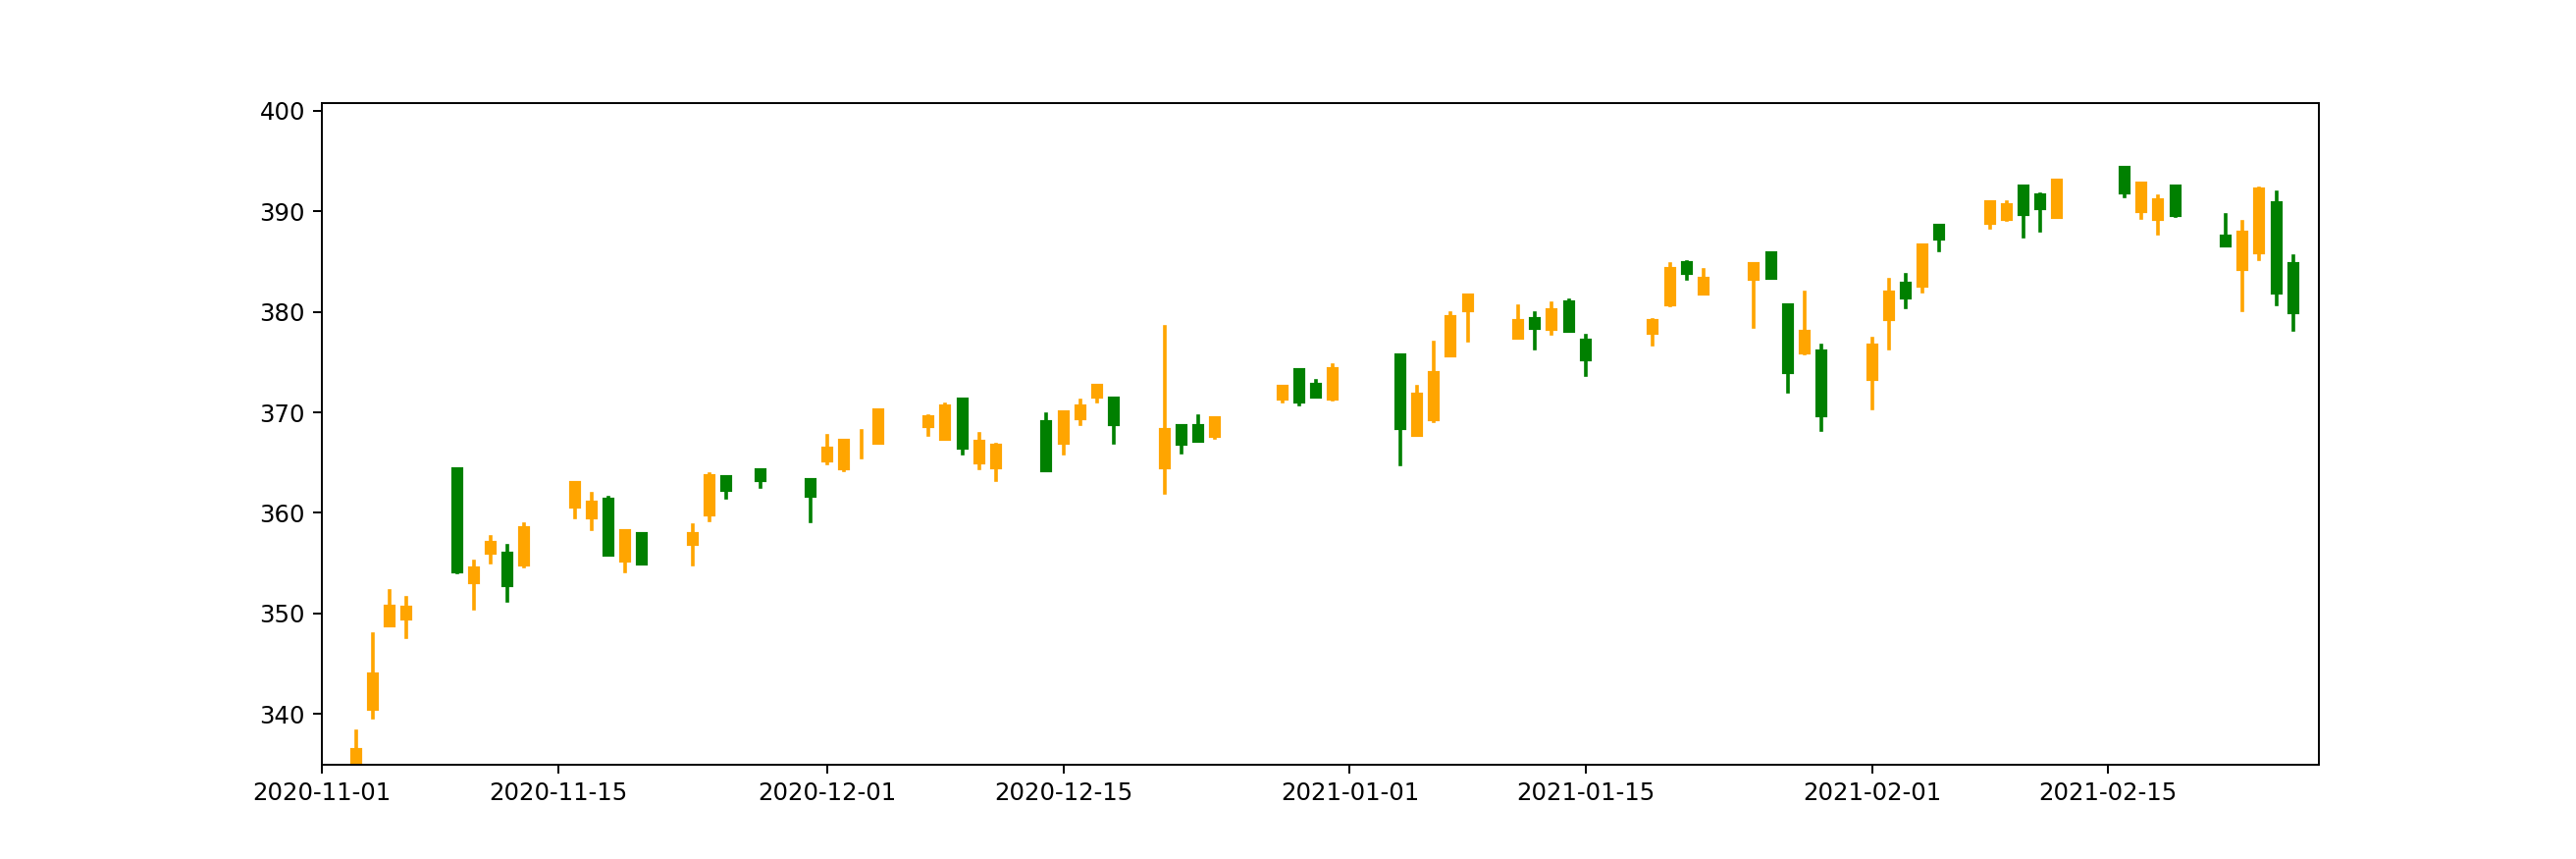

In [30]:
%matplotlib notebook

plt.figure(figsize=(15,5))
#plot up days
up = data['Open'] < data['Close']
plt.plot([data['Date'][up],data['Date'][up]],[data['High'][up],data['Low'][up]],color='orange')
plt.plot([data['Date'][up],data['Date'][up]],[data['Open'][up],data['Close'][up]],color='orange',linewidth=5)

#plot down days
plt.plot([data['Date'][~up],data['Date'][~up]],[data['High'][~up],data['Low'][~up]],color='green')
plt.plot([data['Date'][~up],data['Date'][~up]],[data['Open'][~up],data['Close'][~up]],color='green',linewidth=5)

plt.show()